In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1212)

In [4]:
class gaussianDist:
    def __init__(self, name, mu, sigma, size):
        self.name = name
        self.mu = mu
        self.sigma = sigma
        self.size = size
        self.points = np.random.normal(self.mu, self.sigma, self.size)

    def density(self, x):
        return (
            1
            / (self.sigma * np.sqrt(2 * np.pi))
            * np.exp(-(x - self.mu) ** 2 / (2 * self.sigma ** 2))
        )

    def plot(self):
        count, bins, _ = plt.hist(self.points, 30, density=True)
        plt.plot(bins, self.density(bins), linewidth=2, color="r", label="f(x)")
        plt.legend(loc="best")
        plt.show()

    def describe(self):
        print("Gaussian Dist Description:")
        print("Name: %s" % self.name)
        print("Size = %d" % self.size)
        print("Mu = %.4f" % self.mu)
        print("Sigma = %.4f" % self.sigma)

In [5]:
def plotDistsTogether(*dists):
    for dist in dists:
        count, bins, _ = plt.hist(dist.points, 30, density=True)
        plt.plot(bins, dist.density(bins), linewidth=2, label="f(x) " + dist.name)
        plt.legend(loc="best")
    plt.show()


def densityDistsTogether(point, *dists):
    totalDensity = 0
    thetas = list(map(lambda x: x.size, dists))
    totalDistsSize = np.sum(thetas)

    for dist in dists:
        dens = dist.density(point)
        totalDensity += dens * dist.size / totalDistsSize
        print("f(%d in %s) = " % (point, dist.name), dens)

    print("Thetas =", thetas)
    print("Thetas Sum = %d" % totalDistsSize)
    print("Total f(%d) = " % (point), totalDensity)

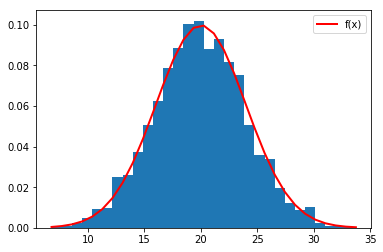

In [6]:
dist1 = gaussianDist("dist1", 20, 4, 3000)
dist1.plot()

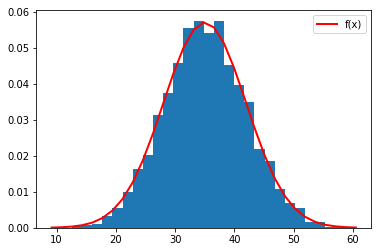

In [7]:
dist2 = gaussianDist("dist2", 35, 7, 5000)
dist2.plot()

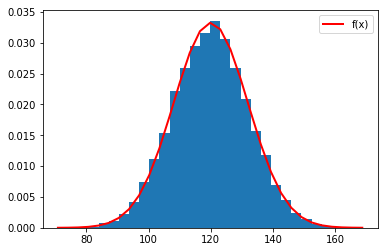

In [8]:
dist3 = gaussianDist("dist3", 120, 12, 10000)
dist3.plot()

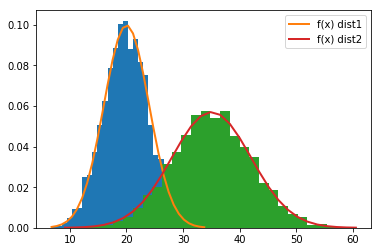

In [9]:
plotDistsTogether(dist1, dist2)

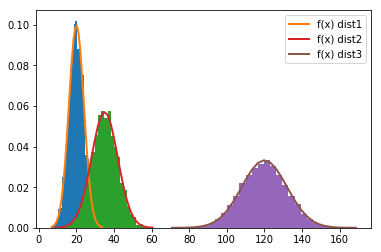

In [10]:
plotDistsTogether(dist1, dist2, dist3)

In [11]:
densityDistsTogether(120, dist1, dist2, dist3)

f(120 in dist1) =  1.9134824341e-137
f(120 in dist2) =  5.46604152051e-34
f(120 in dist3) =  0.0332451900335
Thetas = [3000, 5000, 10000]
Thetas Sum = 18000
Total f(120) =  0.0184695500186


In [12]:
densityDistsTogether(25, dist1, dist2)

f(25 in dist1) =  0.0456622713473
f(25 in dist2) =  0.0205425518213
Thetas = [3000, 5000]
Thetas Sum = 8000
Total f(25) =  0.0299624466435


In [13]:
densityDistsTogether(25, dist1, dist2, dist3)

f(25 in dist1) =  0.0456622713473
f(25 in dist2) =  0.0205425518213
f(25 in dist3) =  8.1719760757e-16
Thetas = [3000, 5000, 10000]
Thetas Sum = 18000
Total f(25) =  0.0133166429527


In [14]:
densityDistsTogether(70, dist1, dist2, dist3)

f(70 in dist1) =  1.17379883949e-35
f(70 in dist2) =  2.12388502105e-07
f(70 in dist3) =  5.64691749073e-06
Thetas = [3000, 5000, 10000]
Thetas Sum = 18000
Total f(70) =  3.19617318988e-06


## Superclass Discovery

In [15]:
class SuperClass:
    def __init__(self):
        self.mu = 0
        self.sigma = 0
        self.alpha = 0
        self.beta = 0
        self.size = 0
        self.subclasses = []
        self.n_subclasses = 0
        self.points = []

    def insert_subclass(self, dist):
        self.points.extend(dist.points)
        self.mu = self.calculate_incremental_mu(dist)
        self.sigma = self.calculate_std_dev(dist)
        self.n_subclasses += 1
        self.subclasses.append(dist.name)
        self.size += dist.size

    def calculate_incremental_mu(self, dist):
        return (self.mu * self.size + dist.mu * dist.size) / (self.size + dist.size)
    
    def calculate_std_dev(self, dist):
        variance = 0
        for point in self.points:
            variance += (point - self.mu)**2
        variance /= (self.size + dist.size)
        
        return np.sqrt(variance)
        
    def describe(self):
        print("Superclass Description:")
        print("Size = %d" % self.size)
        print("Known subclasses:", self.subclasses)
        print("Number of known subclasses = %d" % self.n_subclasses)
        print("Mu = %.4f" % self.mu)
        print("Sigma = %.4f" % self.sigma)
        print("Alpha = %.4f" % self.alpha)
        print("Beta = %.4f" % self.beta)

In [16]:
sc = SuperClass()
sc.insert_subclass(dist1)
sc.describe()

Superclass Description:
Size = 3000
Known subclasses: ['dist1']
Number of known subclasses = 1
Mu = 20.0000
Sigma = 4.0225
Alpha = 0.0000
Beta = 0.0000


In [17]:
sc.insert_subclass(dist3)
sc.describe()

Superclass Description:
Size = 13000
Known subclasses: ['dist1', 'dist3']
Number of known subclasses = 2
Mu = 96.9231
Sigma = 43.4593
Alpha = 0.0000
Beta = 0.0000


# Inverse Gamma Distribution

In [18]:
from scipy.stats import invgamma, invwishart

In [19]:
alpha = 5

inv_gamma_dist = invgamma(alpha, loc=sc.sigma - 1./(alpha-1))

In [20]:
inv_gamma_dist.mean()

43.459343215276114

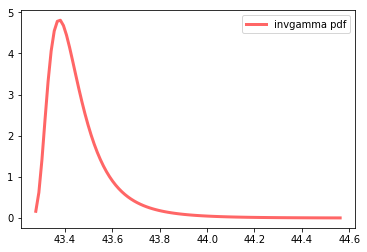

In [21]:
x = np.linspace(inv_gamma_dist.ppf(1e-3), inv_gamma_dist.ppf(1 - 1e-3), 100)

plt.plot(x, inv_gamma_dist.pdf(x), "r-", lw=3, alpha=0.6, label="invgamma pdf")
plt.legend(loc="best")
plt.show()

mean = 10.0
alpha = 1.1
beta = 1
a = 1.1
loc = 0.0


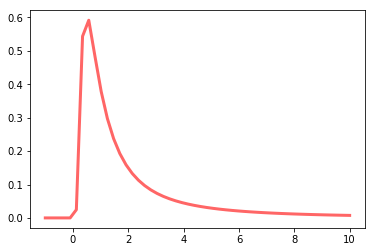

In [53]:
def wiki2scipy(alpha, beta):
    a = alpha
    loc = (beta - 1) / (alpha - 1)
    return a, loc


def updateParams(alpha, beta, samples, new_samples):
    samples += new_samples
    alpha = alpha + len(new_samples) / 2
    # Acredito que esse seja o erro:
    # np.mean(samples) != mu_normal (i.e. mu_normal != x^(_))
    # A definição da atualização do beta assume o conhecimento sobre o mu da distribuição normal
    print('old beta:',beta)
    beta = beta + (np.sum((np.array(new_samples) - .5) ** 2) / 2)
    print('old beta:',beta)
    return alpha, beta, samples


n = 0
alpha = alpha_0 = 1.1
beta = beta_0 = 1
samples = []

np.random.seed(2)
a, loc = wiki2scipy(alpha, beta)
inv_gamma_dist = invgamma(a, loc=loc)
print("mean =", inv_gamma_dist.mean())
print("alpha =", alpha)
print("beta =", beta)
print("a =", a)
print("loc =", loc)
x = np.linspace(-1, 10)
plt.plot(x, inv_gamma_dist.pdf(x), "r-", lw=3, alpha=0.6, label="invgamma pdf")
plt.show()

old beta: 1
old beta: 1.11442129511
mean = 1.01311026828
alpha = 2.1
beta = 1.11442129511
a = 2.1
loc = 0.104019359191


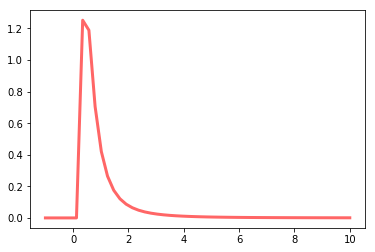

old beta: 1.11442129511
old beta: 1.11774607241
mean = 0.532260034482
alpha = 3.1
beta = 1.11774607241
a = 3.1
loc = 0.056069558292


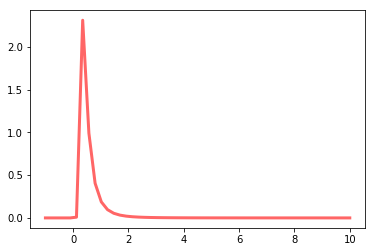

old beta: 1.11774607241
old beta: 1.13530985237
mean = 0.366228984635
alpha = 4.1
beta = 1.13530985237
a = 4.1
loc = 0.0436483394733


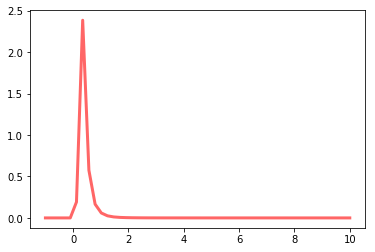

In [54]:
for i in range(3):
    new_samples = np.random.uniform(0, 1, size=2).tolist()
    alpha, beta, samples = updateParams(alpha, beta, samples, new_samples)
    a, loc = wiki2scipy(alpha, beta)
    inv_gamma_dist = invgamma(a, loc=loc)
    print("mean =", inv_gamma_dist.mean())
    print("alpha =", alpha)
    print("beta =", beta)
    print("a =", a)
    print("loc =", loc)
    x = np.linspace(-1, 10)
    plt.plot(x, inv_gamma_dist.pdf(x), "r-", lw=3, alpha=0.6, label="invgamma pdf")
    plt.show()

In [46]:
alpha, beta, samples = updateParams(alpha, beta, samples, new_samples)
print(alpha,beta)

old beta: 48.492893391
old beta: 65.3539348812
203.0 65.3539348812


In [24]:
rvs = []
for i in range(10):
    rvs.append(inv_gamma_dist.rvs(size=10))
print(rvs)

[array([0.25886376, 0.23497819, 0.21558113, 0.23960938, 0.21434821,
       0.22530464, 0.23705679, 0.25367924, 0.23721067, 0.22901551]), array([0.2417228 , 0.23955615, 0.23836033, 0.25065233, 0.22274865,
       0.2089662 , 0.24129203, 0.24381371, 0.23877457, 0.23860193]), array([0.2226296 , 0.22618215, 0.21567005, 0.23140848, 0.22947772,
       0.20768735, 0.25388326, 0.21319136, 0.22776347, 0.22543636]), array([0.23180636, 0.24640791, 0.21237777, 0.24399702, 0.22935025,
       0.24585075, 0.23831676, 0.22692959, 0.2556143 , 0.24148652]), array([0.25805883, 0.22508331, 0.2811109 , 0.21726023, 0.23305377,
       0.22448565, 0.2477436 , 0.21754334, 0.24545492, 0.24194818]), array([0.23158196, 0.23024818, 0.21633823, 0.23106895, 0.23058589,
       0.22572018, 0.24757818, 0.21771592, 0.24902691, 0.2265055 ]), array([0.25011813, 0.25075774, 0.22026156, 0.22094685, 0.25045073,
       0.25113552, 0.22325597, 0.22633773, 0.22763464, 0.24182032]), array([0.26444278, 0.21886155, 0.23073594, 0.24

In [25]:
np.cov(rvs)

array([[ 2.08918414e-04,  9.37016225e-05,  8.14229396e-06,
         3.20271177e-05, -6.49707895e-05,  2.33121010e-05,
        -1.45764233e-05,  1.21198498e-04,  2.66264217e-05,
         8.44372483e-06],
       [ 9.37016225e-05,  1.41510691e-04,  5.98996230e-05,
        -1.10131011e-05,  2.38915988e-05,  1.54630893e-05,
        -9.74805314e-05,  1.09110291e-04,  1.76372447e-05,
        -2.21087738e-07],
       [ 8.14229396e-06,  5.98996230e-05,  1.59479511e-04,
         3.55722042e-05,  1.72530940e-05,  1.01031511e-04,
        -4.87168996e-05,  5.52259689e-05,  4.66886165e-05,
         3.58478466e-05],
       [ 3.20271177e-05, -1.10131011e-05,  3.55722042e-05,
         1.52984528e-04, -1.26807357e-04,  8.66227604e-05,
         3.57175875e-05,  2.94087514e-06, -2.52163095e-05,
         2.54204504e-05],
       [-6.49707895e-05,  2.38915988e-05,  1.72530940e-05,
        -1.26807357e-04,  4.03974965e-04,  1.71773661e-06,
        -5.76491302e-05,  1.18112067e-04,  1.47344574e-04,
        -5.

In [26]:
np.linalg.eigvals(rvs)

array([ 2.32883867+0.j        , -0.0326689 +0.01933351j,
       -0.0326689 -0.01933351j,  0.03855491+0.j        ,
        0.0120492 +0.01963016j,  0.0120492 -0.01963016j,
        0.02154815+0.j        , -0.0149359 +0.01258838j,
       -0.0149359 -0.01258838j, -0.00685633+0.j        ])

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import invwishart, invgamma

x = np.linspace(0.1, 1, 10)

iw = invwishart.pdf(x, df=len(rvs), scale=rvs)

plt.plot(x, iw)
plt.title("Inverse Wishart PDF")
plt.show()

ig = invgamma.pdf(x, a=(6 / 2.0), scale=(1.0 / 2))

plt.plot(x, ig)
plt.title("Inverse Gamma PDF")
plt.show()

LinAlgError: 4-th leading minor of the array is not positive definite